In [1]:
# %matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
from scipy import stats

spotify_data = pd.read_csv("Resources/data.csv")

spot_data = pd.DataFrame(spotify_data)

spot_data.head()



,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [2]:
spot_data.columns

drop_columns = ['acousticness', 'duration_ms', 'energy', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo',
       'valence']
clean_spot = spot_data.drop(columns=drop_columns)

clean_spot = clean_spot.rename(columns={"artists":"Artist","danceability":"Danceability","explicit":"Explicit","name":"Song Name","popularity":"Popularity","release_date":"Release Date","year":"Release Year"})

clean_spot["Danceability"] = clean_spot["Danceability"]*100

clean_spot["Danceability"] = clean_spot["Danceability"].map("{0:,.2f}%".format)

clean_spot["Artist"] = clean_spot["Artist"].str.strip('[]')
clean_spot["Artist"] = clean_spot["Artist"].str.strip('[""]')
clean_spot["Artist"] = clean_spot["Artist"].str.strip("['']")

clean_spot.head()

,Artist,Danceability,Explicit,Song Name,Popularity,Release Date,Release Year
0,Mamie Smith,59.80%,0,Keep A Song In Your Soul,12,1920,1920
1,Screamin' Jay Hawkins,85.20%,0,I Put A Spell On You,7,1920-01-05,1920
2,Mamie Smith,64.70%,0,Golfing Papa,4,1920,1920
3,Oscar Velazquez,73.00%,0,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,1920
4,Mixe,70.40%,1,Xuniverxe,2,1920-10-01,1920


In [3]:
#Get Artists Names & Popularity, and Dancability Columns
#Get Song titles, Popularity and Danceability Columns


#Groupby Artist Name, Sort by Popularity
#Groupby Song Title, Sort by Popularity

#Groupby Artist Name, Sort by Danceability
#Groupby Song Title, Sort by Danceability

#Find the relationship between Explicit & Popularity of an artist and a song

#Groupby Explicit, sort by Popularity of an Artist
#Groupby Explicit, sort by Popularity of an Song
clean_spot


,Artist,Danceability,Explicit,Song Name,Popularity,Release Date,Release Year
0,Mamie Smith,59.80%,0,Keep A Song In Your Soul,12,1920,1920
1,Screamin' Jay Hawkins,85.20%,0,I Put A Spell On You,7,1920-01-05,1920
2,Mamie Smith,64.70%,0,Golfing Papa,4,1920,1920
3,Oscar Velazquez,73.00%,0,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,1920
4,Mixe,70.40%,1,Xuniverxe,2,1920-10-01,1920
...,...,...,...,...,...,...,...
174384,"DJ Combo', 'Sander-7', 'Tony T",79.20%,0,The One,0,2020-12-25,2020
174385,Alessia Cara,42.90%,0,A Little More,0,2021-01-22,2021
174386,Roger Fly,67.10%,0,Together,0,2020-12-09,2020
174387,Taylor Swift,46.20%,1,champagne problems,69,2021-01-07,2021


In [4]:
#How many artist contributed to this database?

unique_artists = clean_spot["Artist"].nunique()
total_artists = clean_spot["Artist"].count()
art_percentage = unique_artists/total_artists
art_percentage = art_percentage * 100
art_percentage = round(art_percentage, 2)
print(f"There are {total_artists} Tracks in this database, and {unique_artists} unique artists in the DB. {art_percentage}% of Artists made the majority of the songs in this Database")



There are 174389 Tracks in this database, and 36194 unique artists in the DB. 20.75% of Artists made the majority of the songs in this Database


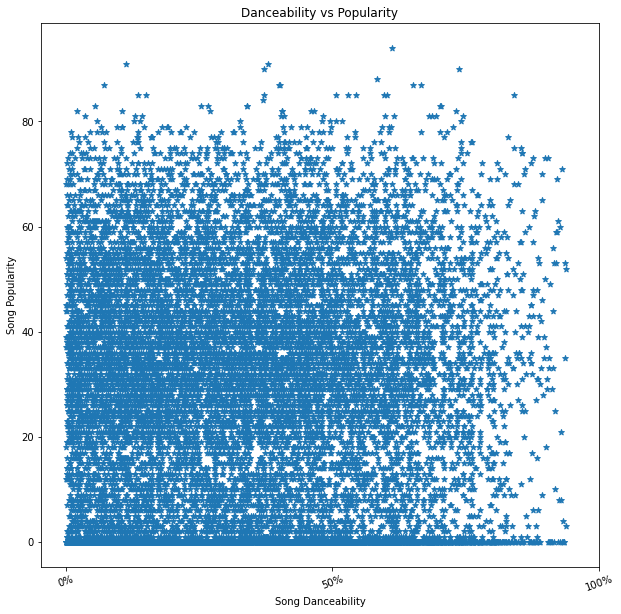

There seems to be no relation between danceability & Popularity given the equal distribution of of populatity among Danceability axis. In fact, on the very high end of dancability, it seems as though populatity declines making the hypothisis null.


In [5]:
samp_spot = clean_spot.sample(frac=0.1, replace=False, random_state=1)

plt.figure(figsize=(10,10))
plt.title("Danceability vs Popularity")
plt.scatter(samp_spot.Danceability,samp_spot.Popularity, marker="*")
plt.xticks([0, 500,1000], ["0%","50%","100%"],rotation=20)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=True,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) 
plt.xlabel("Song Danceability")
plt.ylabel("Song Popularity")
plt.savefig("Images/PopvsDance.png")
plt.show()


print("There seems to be no relation between danceability & Popularity given the equal distribution of of populatity among Danceability axis. In fact, on the very high end of dancability, it seems as though populatity declines making the hypothisis null.")

In [11]:

x = spot_data.danceability
y = spot_data.popularity

res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")


R-squared: 0.015313


In [ ]:
groupie = clean_spot.groupby('Artist').count()

groupie = groupie.sort_values('Danceability', ascending=False)
groupie = groupie.drop(columns=["Danceability","Explicit","Song Name","Popularity","Release Date"])
groupie = groupie.rename(columns={"Release Year":"Song Count"})

groupie = groupie.head(1000)


In [ ]:

clean_spot.sort_values(by='Danceability', ascending=False, inplace=True)
clean_spot.head(20)

In [ ]:
artist = clean_spot.groupby("Artist").sum()
artist.sort_values(by='Popularity', ascending=False, inplace=True)
# artist_sum = clean_spot.groupby("Arist").sum()
# # clean_spot.sort_values(by='Popularity', ascending=False, inplace=True)
artist.drop(columns=["Explicit","Release Year"],inplace=True)
art = artist.head(100)
art
# art.plot(how='bar')

# x_axis = np.arange(1920, 2022, 1)
# dance_points = year_df["Artist"]
# pop_points = year_df["Popularity"]

# dance_plot = plt.plot(x_axis, dance_points, color="blue", label="Danceability")
# pop_plot = plt.plot(x_axis, pop_points, color="orange", label="Popularity")
# plt.xlim(1915, 2030)
# plt.ylim(-5, 105)
# plt.xlabel("Release Year")
# plt.ylabel("Danceability and Popularity (%)")
# plt.title("Average Danceability and Popularity of Songs Over Time")
# plt.legend(labels=["Danceability", "Popularity"], loc="best")
# plt.grid()
# plt.savefig("Images/DancePopOverTime.png")
# plt.show()

